# Análisis de Inversiones en Depósitos#

*Los depósitos son productos financieros de Renta Fija, en los que se deposita nuestros ahorros durante un plazo de tiempo pactado por anticipado y la entidad financiera se compromete al final de dicho periodo a devolver el principal más una serie de intereses. El cálculo de los intereses se hace mediante la fórmula de interés compuesto*

*En este apartado mediante class de Python, vamos a definir una serie de funciones que serán aplicables a nuestros depósitos, de los que previamente habremos definido sus características, para finalmente poder hacer comparaciones entre depósitos de distintas entidades*

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.close("all")

*Vamos a empezar por desarrollar funciones que nos den respuesta a las siguientes preguntas*

- ¿Cuánto dinero voy a ganar con mi inversión?
- ¿A determinado interés, cuánto tiempo debo mantener mi inversión para llegar a la ganancia objetivo?
- ¿Qué tipo de interés debo buscar si quiero obtener una ganancia concreta y durante un tiempo concreto?
- Comparativa de distintas inversiones



In [5]:
#Damos forma a determinadas funciones que después vamos a incorporar en nuestra class
#Empezamos por los DEPÓSITOS

def VF(rate, nper, pmt, pv, when=0):     #para conocer el importe que voy a obtener al final de periodo
    VF = npf.fv(rate, nper, pmt, pv, when)
    return VF

def RATE(nper, pmt, pv, fv, when=0):           #En caso de conocer el resto de los datos pero no el interés.
    RATE = npf.rate(nper, pmt, pv, fv, when)
    return RATE

def INTERESES(rate, nper, pmt, pv, when=0):       #Para conocer los intereses que genera mi depósito
    pv = pv
    VF = npf.fv(rate, nper, pmt, -pv, when)
    INTERESES = VF - pv
    return INTERESES
    
def TIEMPO(rate, pmt, pv, fv=0, when=0):    #Si quiero conocer el tiempo que debo mantener una inversión 
    TIEMPO = npf.nper(rate, pmt, -pv, fv=0, when=when)
    return TIEMPO

In [13]:
class Depositos:   #En la primera parte definimos las propiedades que deben tener los datos iniciales
    
    @property 
    def nper(self): return self._nper 
    @nper.setter
    def nper(self, nper):
        if type(nper) == int and nper >= 0 or type(nper) == type(None):
            self._nper = nper
        else: print("La duración del periodo debe ser > 0")
            
    @property 
    def pv(self): return self._pv 
    @pv.setter
    def pv(self, pv):
        if (type(pv) == int or type(pv) == float) and pv > 0:
            self._pv = pv
        else: print("La inversión inicial debe ser > 0")
            
    @property 
    def pmt(self): return self._pmt 
    @pmt.setter
    def pmt(self, pmt):
        if (type(pmt) == int or type(pmt) == float) and pmt > 0:
            self._pmt = pmt
        elif pmt == 0:
            self._pmt = 1
        else: print("Los pagos deben ser > 0 o iguales a 0")
            
    @property 
    def fv(self): return self._fv 
    @fv.setter
    def fv(self, fv):
        if (type(fv) == int or type(fv) == float) and fv > 0 or type(fv) == type(None):
            self._fv = fv
        else: print("La inversión final debe ser > 0 o no existir")
            
    @property
    def rate(self): return self._rate 
    @rate.setter
    def rate(self, rate):
        if type(rate) == float and rate >= 0 or type(rate) == type(None): 
            self._rate = rate
        else: print("El interés (8% = 0.08) de ser > 0")
            
    @property
    def typ(self): return self._typ
    @typ.setter
    def typ(self, typ):
        if typ == 0 or typ == 1:
            self._typ = typ
        else: print("typ must be 0 or 1")
            
    def __init__(self, rate, nper, pmt, pv, typ, fv = None):  
        self.rate = rate      #Para realizar los cálculos, debemos conocer todas estas variables, incluso si no existen o son 0             
        self.nper = nper
        self.pmt = pmt
        self.pv = pv                 
        self.typ = typ
        self.fv = fv
        
    #Definimos funciones que podemos hacer con nuestros depositos
    
    def INTERESES(self):       
        return INTERESES(self.rate, self.nper, self.pmt, self.pv, self.typ)
        
    #Este análisis nos hace un resumen de la inversión, además de calcular los intereses finales.
        
    def AnalisisFinal(self): 
        Final = round(VF(self.rate, self.nper, self.pmt, -self.pv, self.typ),2)
        Interes = round(INTERESES(self.rate, self.nper, self.pmt, self.pv, self.typ),2)
        return print("""Si invierte un capital de {} euros, durante {} años, a un interés de {}, 
            obtendrá unos intereses de {} euros, y un capital final de {} euros.""".format(self.pv, self.nper, self.rate, Interes, Final))
    
    #Este análisis nos permite conocer el tipo de interés después de haber obtenido nuestros intereses. 
    #O bien, buscar un depósito que esté remunerado a un determinado tipo de interés.
    
    def AnalisisInter(self):
        Inter = round(RATE(self.nper, self.pmt, -self.pv, self.fv, self.typ)*100,2)
        return print("""Si invierte un capital de {} euros, durante {} años, y obtiene al final {} euros,
                Su inversión estará remunerada a un {} %""".format(self.pv, self.nper, self.fv, Inter))
    
    #Este análisis nos permite saber el tiempo que debemos mantener nuestro depósito para obtener determinado beneficio
    
    def AnalisisTiempo(self):
        TEMPO = np.around(npf.nper(self.rate, self.pmt, -self.pv, self.fv, self.typ),2)
      
        return print("""Si invierte un capital de {} euros, a un tipo de interés {} % y obtiene al final {} euros,
                Su inversión habrá estado {} años""".format(self.pv, self.rate, self.fv, TEMPO,0))

*Vamos a ver el funcionamiento*

In [7]:
#Conocer los intereses finales.

depo1 = Depositos(0.07,4,0,1000,0, None)
    
depo1.AnalisisFinal()

Si invierte un capital de 1000 euros, durante 4 años, a un interés de 0.07, 
            obtendrá unos intereses de 310.8 euros, y un capital final de 1310.8 euros.


In [8]:
#Conocer el tipo de interés.

depo2 = Depositos(0.0,4,0,1000,0, 1310.8)

depo2.AnalisisInter()

Si invierte un capital de 1000 euros, durante 4 años, y obtiene al final 1310.8 euros,
                Su inversión estará remunerada a un 7.0 %


In [14]:
#Conocer el tiempo

depo3= Depositos(0.07,0,0,1000,0, 1310.8)

depo3.AnalisisTiempo()

Si invierte un capital de 1000 euros, a un tipo de interés 0.07 % y obtiene al final 1310.8 euros,
                Su inversión habrá estado 4.05 años


*Vamos a utilizar estas funciones para hacer gráficas y comparar distintos depósitos*

*Vamos a llamar a los Depósitos por entidades bancarias, y crear varios depósitos para trabajar con ellos*

In [10]:
ING = Depositos(0.03, 4, 0, 1000, 0, fv = None)
BANKIA = Depositos(0.035, 5, 0, 1000, 0, None)
BSCH = Depositos(0.05, 3, 0, 1000, 0, None)
BANKINTER = Depositos(0.02, 7, 0, 1000, 0, None)
CAIXA = Depositos(0.04, 6, 0, 1000, 0, None)

*Vamos a calcular los intereses de cada depósito en función de sus condiciones y crear una lista*

In [11]:
Intereses = []
a = ING.INTERESES()
Intereses.append(a)

a = BANKIA.INTERESES()
Intereses.append(a)

a = BSCH.INTERESES()
Intereses.append(a)

a = BANKINTER.INTERESES()
Intereses.append(a)

a = CAIXA.INTERESES()
Intereses.append(a)

print(Intereses)

[125.50881000000004, 187.68630564687442, 157.62500000000023, 148.68566764928005, 265.31901849600035]


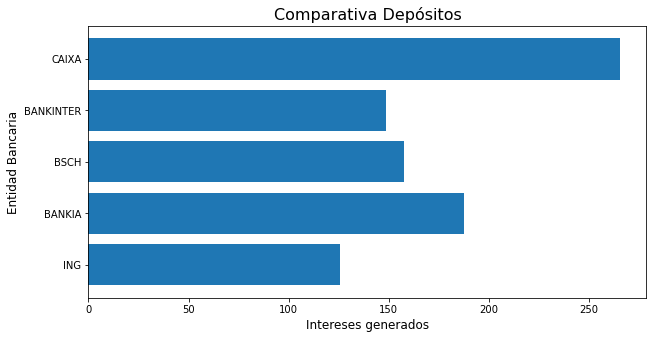

In [12]:
p = ['ING', 'BANKIA', 'BSCH', 'BANKINTER', 'CAIXA']
plt.figure(figsize = (10, 5))
plt.barh(p, Intereses, height=0.8, align='center')
plt.title("Comparativa Depósitos", fontsize = 16)
plt.xlabel("Intereses generados", fontsize = 12)
plt.ylabel("Entidad Bancaria", fontsize=12)
plt.show()

*Esta comparativa nos muestra los intereses que obtendríamos en cada una de las entidades, pero si nos fijamos, cada una de estas entidades nos "obliga" a mantener la inversión durante diferentes periodos de tiempo, por lo que la comparación no es homogenea.*

*Vamos a unificar los tiempos, para comparar mejor*

In [18]:
n = 1 #hemos creado variable n, sustituyendola en nuestros depósitos, para poder unificar y realizar distintos cálculos
ING = Depositos(0.03, n, 0, 1000, 0, fv = None)
BANKIA = Depositos(0.035, n, 0, 1000, 0, None)
BSCH = Depositos(0.05, n, 0, 1000, 0, None)
BANKINTER = Depositos(0.02, n, 0, 1000, 0, None)
CAIXA = Depositos(0.04, n, 0, 1000, 0, None)

In [19]:
Intereses = []
a = ING.INTERESES()
Intereses.append(a)

a = BANKIA.INTERESES()
Intereses.append(a)

a = BSCH.INTERESES()
Intereses.append(a)

a = BANKINTER.INTERESES()
Intereses.append(a)

a = CAIXA.INTERESES()
Intereses.append(a)

print(Intereses)

[29.0, 34.0, 49.0, 19.0, 39.0]


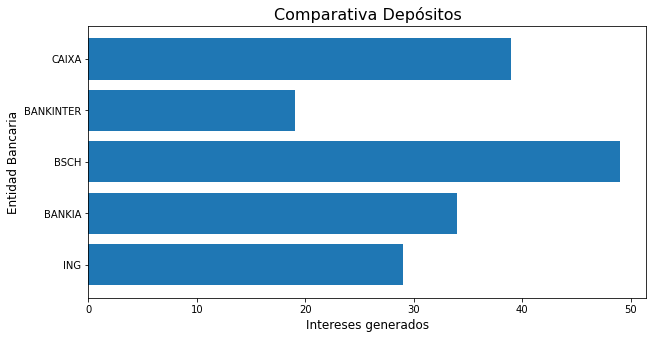

In [20]:
p = ['ING', 'BANKIA', 'BSCH', 'BANKINTER', 'CAIXA']
plt.figure(figsize = (10, 5))
plt.barh(p, Intereses, height=0.8, align='center')
plt.title("Comparativa Depósitos", fontsize = 16)
plt.xlabel("Intereses generados", fontsize = 12)
plt.ylabel("Entidad Bancaria", fontsize=12)
plt.show()

*Como vemos, al unificar los periodos, la gráfica cambia completamente, y siendo el depósito del BSCH el más rentable. Tendríamos que análizar entonces si lo que nos interesa es obtener más rentabilidad en el menor tiempo posible, o por el contrario lo que nos interesa es conseguir el máximo montante de intereses, y por tanto Caixa se nos plantea como mejor alternativa*

*Nótese que no podemos invertir 6 años en el depósito de Bsch, estaría limitado a 3 años*